# Recommender Systems : 1.0

In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls -l

total 4672
-rw-rw-r--@ 1 sathisanvannadil  staff    49292 Aug 31  2018 Movie_Id_Titles
-rw-r--r--  1 sathisanvannadil  staff   118147 May 15 12:09 iPrep_D08_0512.ipynb
-rw-rw-r--@ 1 sathisanvannadil  staff  1979226 Aug 31  2018 u.data
-rw-rw-r--@ 1 sathisanvannadil  staff   236344 Aug 31  2018 u.item


In [3]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
u_data = pd.read_csv('u.data')
u_data.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [5]:
# u_item = pd.read_csv('u.item', sep="|")
# u_item.head()

In [6]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
user_data = pd.read_csv('u.data', sep='\t', names= column_names)
user_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


- Merge user_data and movie_titles

In [7]:
movie_data = pd.merge(user_data,movie_titles, on='item_id' )
movie_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


- Average Rating

In [8]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

- Number of Rating

In [9]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

- Create a rating DF

In [10]:
ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

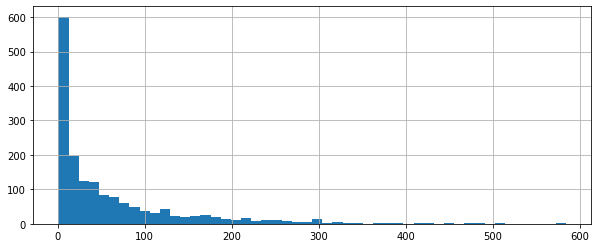

In [12]:
plt.figure(figsize=(10, 4))
ratings['num of ratings'].hist(bins=50)

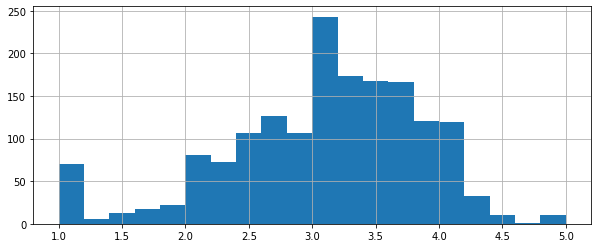

In [13]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=20)

In [14]:
movie_data['rating'].unique()

array([5, 4, 2, 3, 1])

<Figure size 720x288 with 0 Axes>

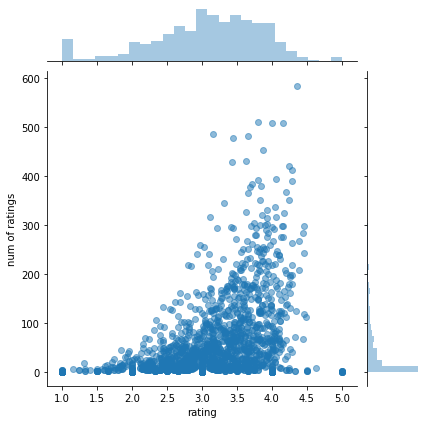

In [15]:
plt.figure(figsize=(10, 4))
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

### Recommending Similar Movies

In [16]:
movie_data_mat = movie_data.pivot_table(index='user_id', columns='title', values='rating')
movie_data_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Most Rated Movies

In [17]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [18]:
# Grab user ratings for : Star Wars (1977) & Fargo (1996)

In [19]:
starwars_user_ratings = movie_data_mat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [20]:
similar_to_starwars = movie_data_mat.corrwith(starwars_user_ratings)

/Users/sathisanvannadil/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sathisanvannadil/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
correlation_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
similar_to_starwars.dropna(inplace=True)

In [22]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [23]:
correlation_starwars = correlation_starwars.join(ratings['num of ratings'])

In [24]:
correlation_starwars[correlation_starwars['num of ratings'] > 100].sort_values('correlation', ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [25]:
# Top 10
correlation_starwars[correlation_starwars['num of ratings'] > 100].sort_values('correlation', 
                                                                               ascending=False).head(10)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [26]:
fargo_user_ratings = movie_data_mat['Fargo (1996)']
fargo_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [27]:
similar_to_fargo = movie_data_mat.corrwith(fargo_user_ratings)

correlation_fargo = pd.DataFrame(similar_to_fargo, columns=['correlation'])
similar_to_fargo.dropna(inplace=True)

In [28]:
similar_to_fargo.head()

title
'Til There Was You (1997)    0.100000
1-900 (1994)                 0.866025
101 Dalmatians (1996)       -0.245368
12 Angry Men (1957)          0.098676
187 (1997)                   0.142509
dtype: float64

In [29]:
correlation_fargo = correlation_fargo.join(ratings['num of ratings'])

In [30]:
correlation_fargo[correlation_fargo['num of ratings'] > 100].sort_values('correlation', ascending=False)

,correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
...,...,...
Murder at 1600 (1997),-0.164567,218
Conan the Barbarian (1981),-0.174455,107
"Peacemaker, The (1997)",-0.192570,136


In [31]:
# Top 10
correlation_fargo[correlation_fargo['num of ratings'] > 100].sort_values('correlation', 
                                                                               ascending=False).head(10)

,correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121
